In [216]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from lib import load_data
import seaborn as sns
%matplotlib inline

In [217]:
users_df, costs_df, relations_df, visits_df, orders_df = load_data()

### Задание №2:
### 1. Рассчитать для показателей Retention (процент вернувшихся пользователей на сайт) целевые lifetimes в разрезе маркетинговых источников.

In [218]:
print('Users registrations slice: {} -- {}'.format(
    users_df['Reg_date'].max().strftime('%Y-%m-%d'), 
    users_df['Reg_date'].min().strftime('%Y-%m-%d')))

Users registrations slice: 2017-12-31 -- 2017-06-01


#### Slice Users to the ones that have whole lifetime

In [219]:
lifetime_days_limit = 30
mask = users_df['Reg_date'] < (users_df['Reg_date'] - np.timedelta64(lifetime_days_limit, 'D'))
users_df.drop(users_df.index[mask], inplace=True)

#### Join Users with relations (to get chanel) and Visits with Users (to get Reg_date and chanel)

In [220]:
users_df = users_df.merge(relations_df, how='inner', on=['name', 'id_partner'])
visits_df = visits_df.merge(users_df[['Reg_date','chanel','id']], 
                            how='right', left_on='id_user', right_on='id')

#### Find how many days passed till visit since registration

In [221]:
visits_df['Visit_date'] = visits_df['Visit_date'].dt.normalize()
visits_df.drop(visits_df.index[visits_df['Visit_date'] < visits_df['Reg_date']], inplace=True)
no_visits_mask = visits_df['Visit_date'].isnull()
visits_df.loc[no_visits_mask, 'Visit_date'] = visits_df.loc[no_visits_mask, 'Reg_date']
visits_df['day'] = visits_df['Visit_date'] - visits_df['Reg_date']

#### First find total number of users, even with the ones that only registered and have no visits

In [222]:
chanel_day_group = visits_df.groupby(['chanel', 'day'])
users_per_day_chanel = chanel_day_group.agg({'id': pd.Series.nunique})
users_per_day_chanel.rename(columns={'id': 'num_users'}, inplace=True)
users_per_chanel = users_per_day_chanel['num_users'].groupby(level=0).first()

In [224]:
chanel_day_group.apply(lambda x: x)

id_user Visit_date   Reg_date             chanel       id     day
0         6362904.0 2017-09-15 2017-09-15               Zero  6362904  0 days
1         6362904.0 2017-09-18 2017-09-15               Zero  6362904  3 days
2         7145363.0 2017-11-05 2017-11-05                  7  7145363  0 days
3         7270453.0 2017-11-15 2017-11-15            TF Test  7270453  0 days
4         7270453.0 2017-11-15 2017-11-15            TF Test  7270453  0 days
5         7270453.0 2017-11-15 2017-11-15            TF Test  7270453  0 days
6         6714895.0 2017-10-03 2017-10-03  VH Mobile GSP USA  6714895  0 days
7         6752744.0 2017-10-04 2017-10-04  VH Mobile GSP USA  6752744  0 days
8         6752744.0 2017-10-06 2017-10-04  VH Mobile GSP USA  6752744  2 days
9         6758236.0 2017-10-04 2017-10-04  VH Mobile GSP USA  6758236  0 days
10        6758236.0 2017-10-05 2017-10-04  VH Mobile GSP USA  6758236  1 days
11        6758236.0 2017-10-08 2017-10-04  VH Mobile GSP USA  6758236  4 days
12        6758236.0 2017-10-08 2017-10-04  VH Mobile GSP USA  6758236  4 days
13        6758236.0 2017-10-08 2017-10-04  VH Mobile GSP USA  6758236  4 days
14        6758236.0 2017-10-10 2017-10-04  VH Mobile GSP USA  6758236  6 days
15        6820908.0 2017-10-08 2017-10-08  VH Mobile GSP USA  6820908  0 days
16        6820908.0 2017-10-10 2017-10-08  VH Mobile GSP USA  6820908  2 days
17        6820908.0 2017-10-10 2017-10-08  VH Mobile GSP USA  6820908  2 days
18        6820908.0 2017-10-21 2017-10-08  VH Mobile GSP USA  6820908 13 days
19        6820908.0 2017-10-22 2017-10-08  VH Mobile GSP USA  6820908 14 days
20        6820908.0 2017-10-22 2017-10-08  VH Mobile GSP USA  6820908 14 days
21        6820908.0 2017-10-22 2017-10-08  VH Mobile GSP USA  6820908 14 days
22        6820908.0 2017-10-24 2017-10-08  VH Mobile GSP USA  6820908 16 days
23        6820908.0 2017-10-24 2017-10-08  VH Mobile GSP USA  6820908 16 days
24        6820908.0 2017-10-24 2017-10-08  VH Mobile GSP USA  6820908 16 days
25        6820908.0 2017-10-24 2017-10-08  VH Mobile GSP USA  6820908 16 days
26        6820908.0 2017-10-24 2017-10-08  VH Mobile GSP USA  6820908 16 days
27        6820908.0 2017-10-24 2017-10-08  VH Mobile GSP USA  6820908 16 days
28        6820908.0 2017-10-25 2017-10-08  VH Mobile GSP USA  6820908 17 days
29        6820908.0 2017-10-25 2017-10-08  VH Mobile GSP USA  6820908 17 days
...             ...        ...        ...                ...      ...     ...
28240384        NaN 2017-11-27 2017-11-27          TS VB Mob  7433485  0 days
28240385        NaN 2017-11-28 2017-11-28          TS VB Mob  7446248  0 days
28240386        NaN 2017-11-22 2017-11-22          TS VB Mob  7373632  0 days
28240387        NaN 2017-11-23 2017-11-23          TS VB Mob  7384918  0 days
28240388        NaN 2017-11-23 2017-11-23          TS VB Mob  7389679  0 days
28240389        NaN 2017-11-23 2017-11-23          TS VB Mob  7390055  0 days
28240390        NaN 2017-11-24 2017-11-24          TS VB Mob  7391563  0 days
28240391        NaN 2017-11-28 2017-11-28          TS VB Mob  7445898  0 days
28240392        NaN 2017-12-03 2017-12-03          TS VB Mob  7509644  0 days
28240393        NaN 2017-11-15 2017-11-15          TS VB Mob  7273095  0 days
28240394        NaN 2017-11-16 2017-11-16          TS VB Mob  7289876  0 days
28240395        NaN 2017-11-19 2017-11-19          TS VB Mob  7319896  0 days
28240396        NaN 2017-11-19 2017-11-19          TS VB Mob  7320648  0 days
28240397        NaN 2017-11-19 2017-11-19          TS VB Mob  7321494  0 days
28240398        NaN 2017-11-19 2017-11-19          TS VB Mob  7324135  0 days
28240399        NaN 2017-11-20 2017-11-20          TS VB Mob  7337630  0 days
28240400        NaN 2017-11-24 2017-11-24          TS VB Mob  7401789  0 days
28240401        NaN 2017-11-25 2017-11-25          TS VB Mob  7414926  0 days
28240402        NaN 2017-12-01 2017-12-01          TS VB Mob  7482742  0 days
28240403        NaN 2017-12-04 201

In [188]:
visits_df.drop(visits_df.index[no_visits_mask], inplace=True) 
grouped = visits_df.groupby(['chanel', 'day'])
lifetimes = grouped.agg({'id': pd.Series.nunique})
lifetimes.rename(columns={'id': 'num_users'}, inplace=True)

#### Limit to chanels with more than 10 registered users

In [189]:
chanels_with_few_users = chanel_user_num.index[chanel_user_num < 10]

In [190]:
user_retention = 100 * lifetimes['num_users'].unstack(0).divide(chanel_user_num, axis=1)
user_retention_slice = user_retention[:lifetime_days_limit+1][user_retention.columns[~user_retention.columns.isin(chanels_with_few_users)]]

In [191]:
user_retention_slice.fillna(0, inplace=True)

In [192]:
user_retention_slice.set_index(pd.Series(user_retention_slice.index).dt.days, inplace=True)

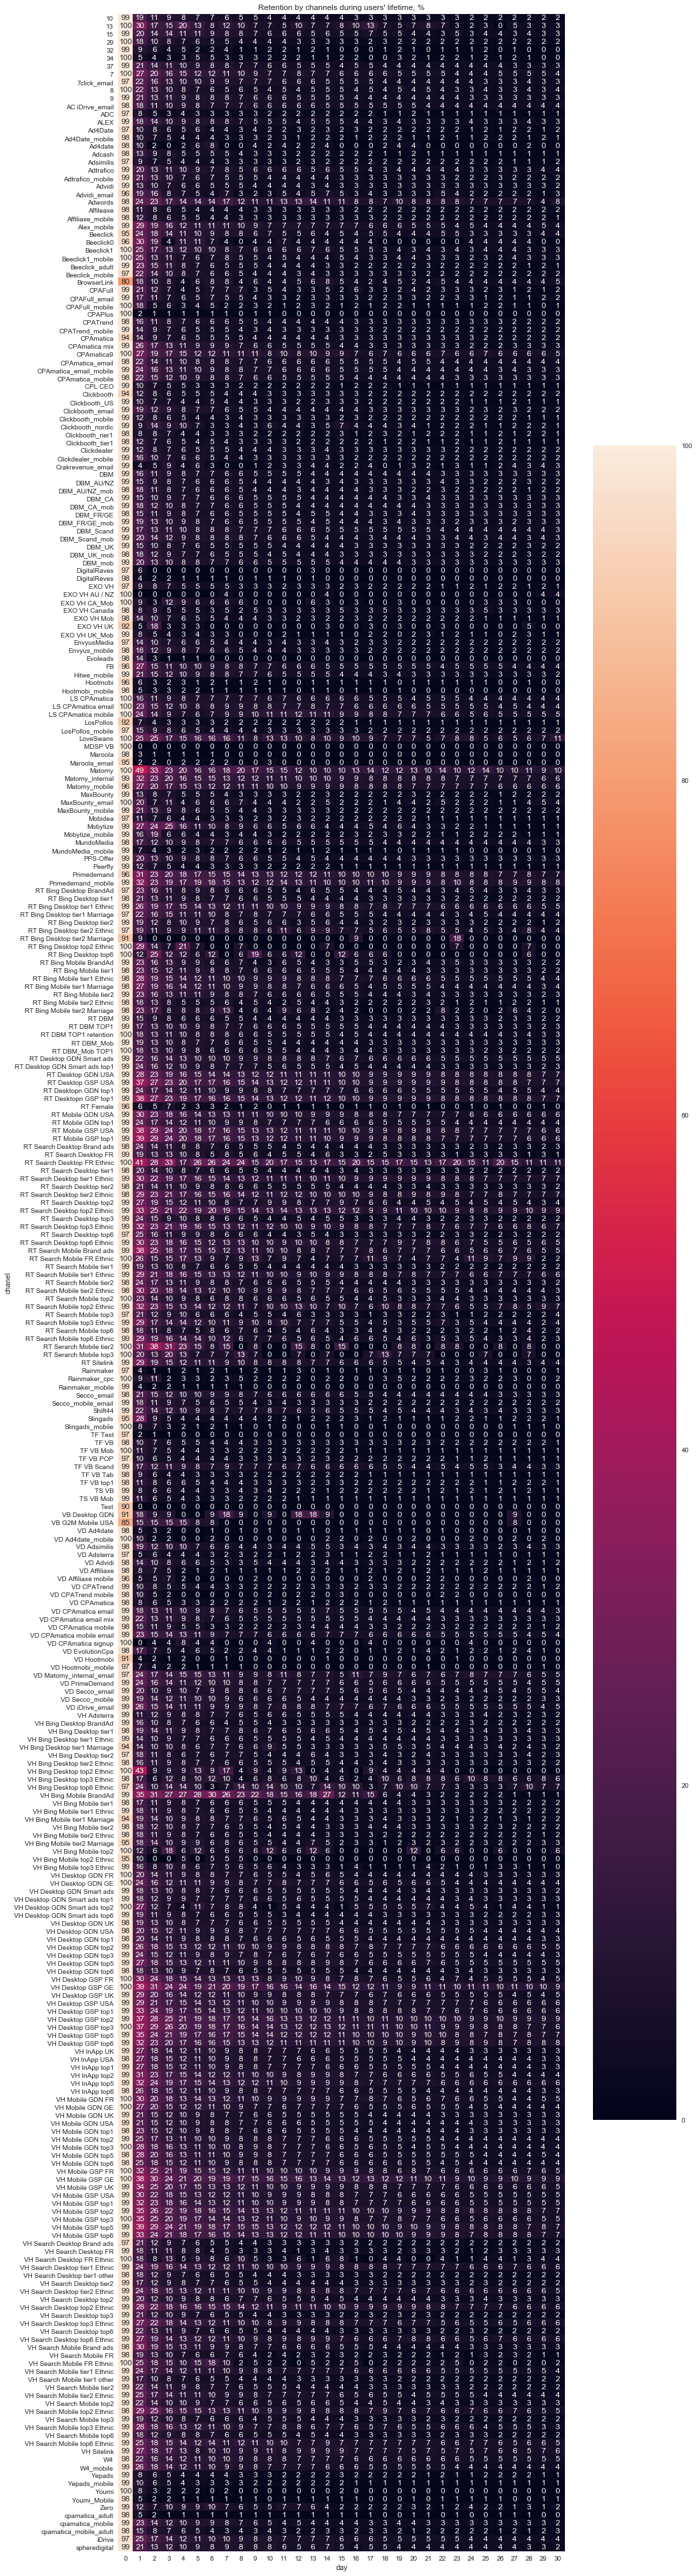

In [193]:
sns.set(style='white')
plt.figure(figsize=(15, 70))
plt.title('Retention by channels during users\' lifetime, %')
ax = sns.heatmap(user_retention_slice.T, annot=True, fmt='.0f');
ax = ax.set(xlabel='day', ylabel='chanel')
plt.show()

In [149]:
# pd.to_datetime(user_retention_slice.index.values).dt.date
# pd.to_datetime(df['Timestamp'], format = '%Y%m%d_%H%M%S.%f')

### 2. Рассчитать для показателей Revenue (выручка) целевые lifetimes в разрезе маркетинговых источников.

In [150]:
orders_df = orders_df.merge(users_df[['Reg_date','chanel','id']], 
                            how='right', left_on='id_user', right_on='id')

In [152]:
no_orders = orders_df['Amount'].isnull()
orders_df['Order Date'] = orders_df['Order Date'].dt.normalize()
orders_df.loc[no_orders, 'Amount'] = 0
orders_df.loc[no_orders, 'Order Date'] = orders_df.loc[no_orders, 'Reg_date']
orders_df['day'] = orders_df['Order Date'] - orders_df['Reg_date']

In [153]:
grouped = orders_df.groupby(['chanel', 'day'])
lifetimes = grouped.agg({'Amount': 'sum'})

In [154]:
chanel_revenue = lifetimes.groupby(level=0).sum()
hundred_thousand_revenue_chanels = chanel_revenue.index[chanel_revenue['Amount'] >= 100000]
minor_revenue_chanels = chanel_revenue.index[(chanel_revenue['Amount'] < 100000) & (chanel_revenue['Amount'] > 0)]
zero_revenue_chanels = chanel_revenue.index[chanel_revenue['Amount'] == 0]
print('Chanels without revenues: {}'.format(zero_revenue_chanels.values))

Chanels without revenues: ['14' '305' '309' '32' '34' '48' '52' 'AC Matomy_internal' 'Ad4date'
 'Ad4date_mobile' 'Advidi_email' 'AsiaCharm' 'CPAFull_mobile' 'CPAPlus'
 'CPAmatica_mix' 'DBM VB' 'DigitalRaves' 'DigitalReves' 'EXO AUNZ_Mob'
 'EXO VH AU / NZ' 'EXO VH CA_Mob' 'EXO VH Canada' 'EXO VH UK'
 'EXO VH UK_Mob' 'Evoleads' 'Ilya Alex' 'LS Clickbooth email'
 'LS Evolution' 'LS Evolution email' 'MDSP VB' 'Maroola_email'
 'MaxBounty_email' 'RT Bing' 'RT Bing Desktop FR'
 'RT Bing Desktop FR Ethnic' 'RT Bing Desktop tier2 Marriage'
 'RT Bing Desktop top2' 'RT Bing Desktop top2 Ethnic'
 'RT Bing Desktop top3 Ethnic' 'RT Bing Desktop top6'
 'RT Bing Desktop top6 Ethnic' 'RT Bing Mobile tier2 Marriage'
 'RT Bing Mobile top2' 'RT Bing Mobile top2 Ethnic'
 'RT Bing Mobile top3 Ethnic' 'RT Bing desktop top2 Ethnic'
 'RT Search Mobile top3' 'RT Search Mobile top6' 'RT Serarch Desktop FR'
 'RT Serarch Desktop tier2' 'RT Serarch Desktop top2'
 'RT Serarch Desktop top6' 'RT Serarch Mobile FR' 'RT

In [155]:
revenue_lifetimes = lifetimes['Amount'].unstack(0)
revenue_lifetimes.fillna(0, inplace=True)

In [156]:
revenue_lifetimes_slice = revenue_lifetimes[:lifetime_days_limit+1][hundred_thousand_revenue_chanels]
revenue_lifetimes_slice.set_index(pd.Series(revenue_lifetimes_slice.index).dt.days, inplace=True)

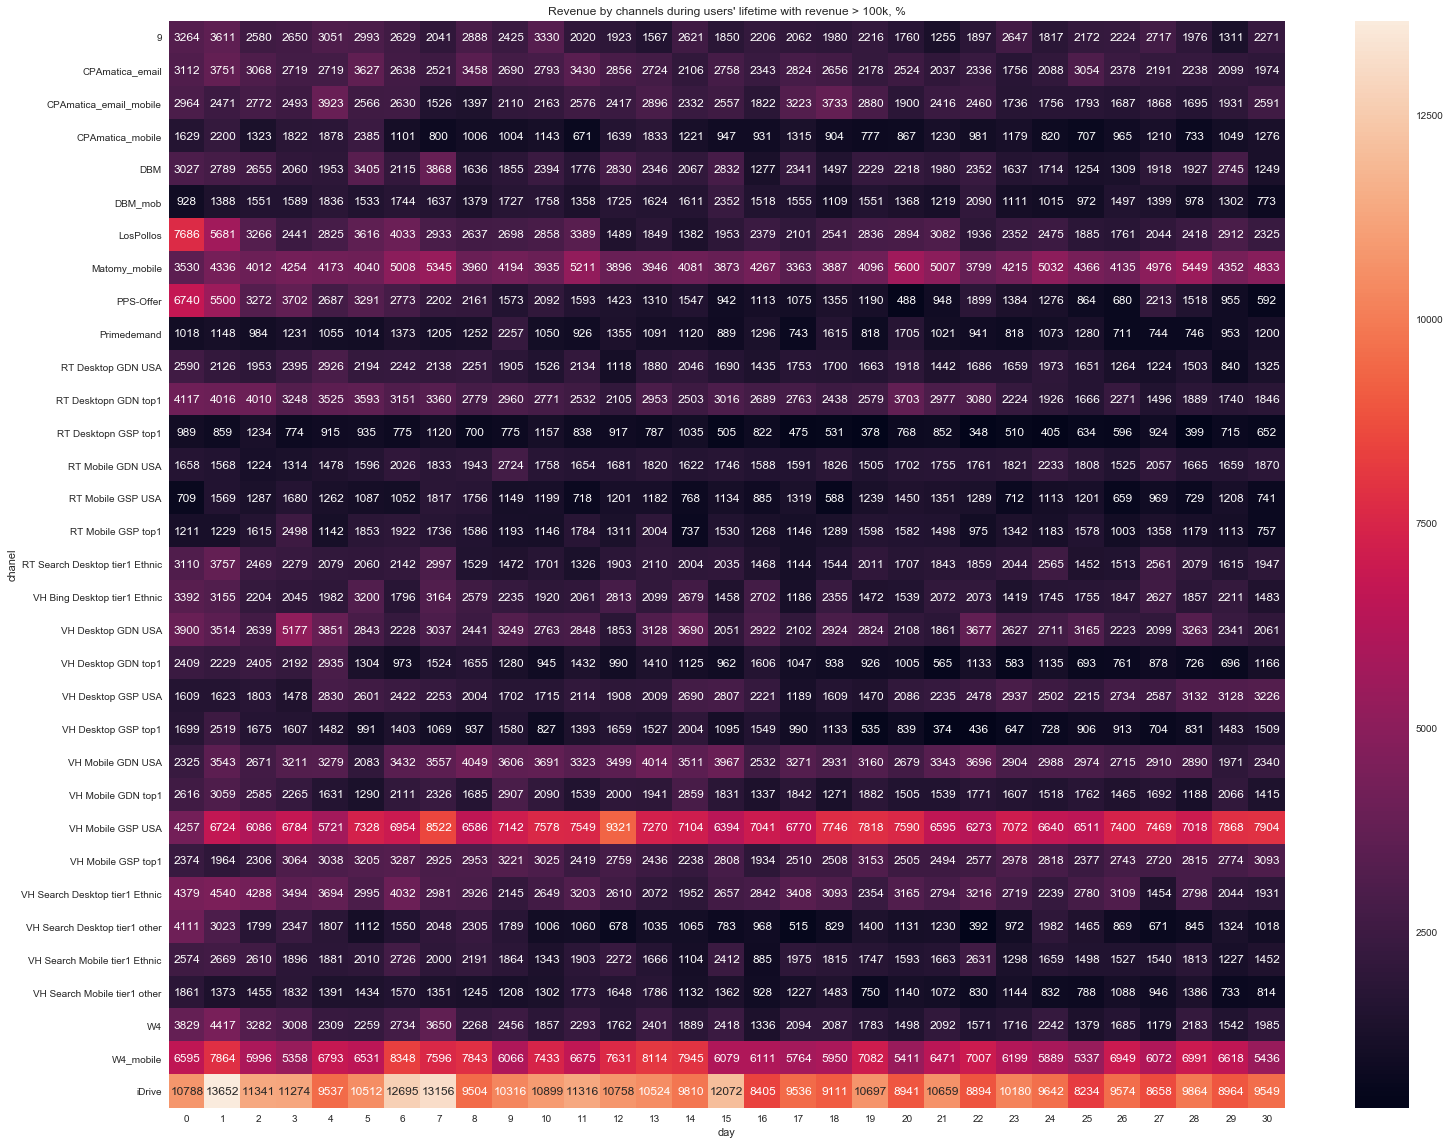

In [157]:
sns.set(style='white')
plt.figure(figsize=(25, 20))
plt.title('Revenue by channels during users\' lifetime with revenue > 100k, %')
ax = sns.heatmap(revenue_lifetimes_slice.T, annot=True, fmt='.0f');
ax = ax.set(xlabel='day', ylabel='chanel')
plt.show()

In [158]:
revenue_lifetimes_slice = revenue_lifetimes[:lifetime_days_limit+1][minor_revenue_chanels]
revenue_lifetimes_slice.set_index(pd.Series(revenue_lifetimes_slice.index).dt.days, inplace=True)

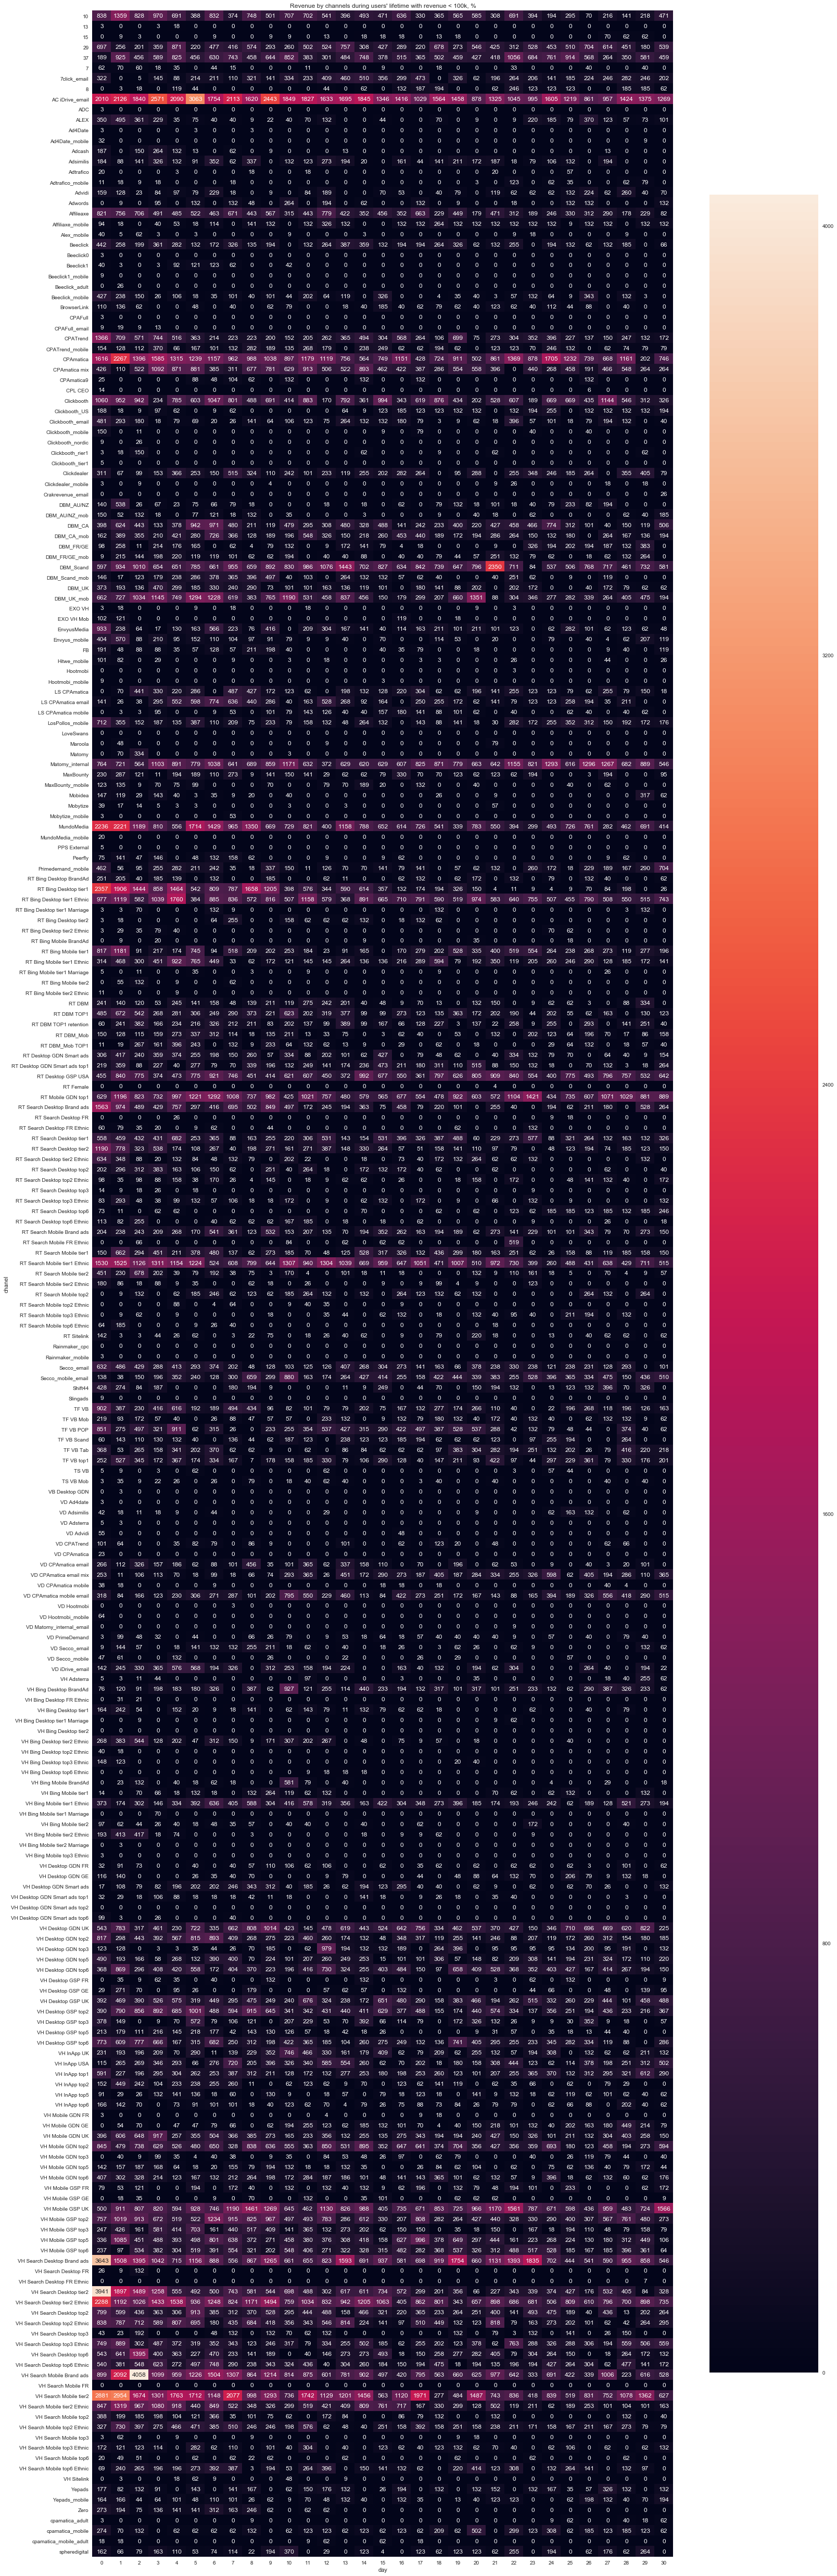

In [159]:
sns.set(style='white')
plt.figure(figsize=(25, 90))
plt.title('Revenue by channels during users\' lifetime with revenue < 100k, %')
ax = sns.heatmap(revenue_lifetimes_slice.T, annot=True, fmt='.0f');
ax = ax.set(xlabel='day', ylabel='chanel')
plt.show()